### Use case:
#### Reducing customer churn by identifying potential churn candidates beforehand, and take proactive actions to make them stay. 
#### We will attempt to build a machine learning model that predicts if a customer will churn. 

<font color='blue'>The steps that will be followed to carry out this project are:</font> 
- Explotary analysis
- Data preprocessing
- Modeling
- evaluating the model



In [1]:
# load required packages 
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import  Image
%matplotlib inline
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [230]:
# read the dataset 
telcom_data=pd.read_csv("Data Science Challenge.csv")

In [209]:
telcom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 24 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [ ]:
# Remove the $ from claim amount column 
claims['CLM_AMT']= claims['CLM_AMT'].str.replace('$', '')
claims['BLUEBOOK']= claims['BLUEBOOK'].str.replace('$', '')
claims['INCOME']= claims['INCOME'].str.replace('$', '')
claims['HOME_VAL']= claims['HOME_VAL'].str.replace('$', '')

In [ ]:
# conver the numrical columns that were recorded as objects 
cols = ['INCOME', 'HOME_VAL', 'BLUEBOOK','CLM_AMT']
claims[cols] = claims[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
claims[['INCOME', 'HOME_VAL', 'BLUEBOOK','CLM_AMT']] = claims[['INCOME', 'HOME_VAL', 'BLUEBOOK','CLM_AMT']].apply(pd.to_numeric,errors='coerce') 
print(claims.dtypes)

In [8]:
# Data overview
print ("Rows     : " ,telcom_data.shape[0])
print ("Columns  : " ,telcom_data.shape[1])
print ("\nFeatures : \n" ,telcom_data.columns.tolist())
print ("\nMissing values :  ", telcom_data.isnull().sum().values.sum())
print ("\nUnique values :  \n",telcom_data.nunique())

Rows     :  3333
Columns  :  21

Features : 
 ['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']

Missing values :   0

Unique values :  
 state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total int

### Our data has no missing values and no conversions are necessary. 
### In the next step we want to conduct a statistical summary to explore our numerical varibales,  these variables are:

Account length
No. vmail msgs
Total day minutes
Total day calls
Total day charge
Total eve minutes
Total eve calls
Total eve calls
Total eve charge
Total night minutes
Total night calls
Total night charge
Total intl minutes
Total intl calls
Total int charge
Customer service calls


In [32]:
telcom_data.describe().round()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0
mean,101.0,437.0,8.0,180.0,100.0,31.0,201.0,100.0,17.0,201.0,100.0,9.0,10.0,4.0,3.0,2.0
std,40.0,42.0,14.0,54.0,20.0,9.0,51.0,20.0,4.0,51.0,20.0,2.0,3.0,2.0,1.0,1.0
min,1.0,408.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,33.0,1.0,0.0,0.0,0.0,0.0
25%,74.0,408.0,0.0,144.0,87.0,24.0,167.0,87.0,14.0,167.0,87.0,8.0,8.0,3.0,2.0,1.0
50%,101.0,415.0,0.0,179.0,101.0,30.0,201.0,100.0,17.0,201.0,100.0,9.0,10.0,4.0,3.0,1.0
75%,127.0,510.0,20.0,216.0,114.0,37.0,235.0,114.0,20.0,235.0,113.0,11.0,12.0,6.0,3.0,2.0
max,243.0,510.0,51.0,351.0,165.0,60.0,364.0,170.0,31.0,395.0,175.0,18.0,20.0,20.0,5.0,9.0


#### - Half of the clients remain in the company for less than 4 months (just over 3 months , 101 days) 
#### - The avrage clinet makes only 4 internatioal calls per month
#### - The avrage total revenue generated during the day is 9, whereas during the night time is 17
#### - Half of clinets tend to make at least one customer service call. 


In [212]:
numerics1=pd.DataFrame(numerics)

In [328]:
telcom_data1=telcom_data

In [329]:
# create new variables 
telcom_data1['TotalCalls']= telcom_data1[['total day calls', 'total eve calls','total night calls']].sum(axis=1)
telcom_data1['TotalCharges']= telcom_data1[['total day charge', 'total eve charge','total night charge']].sum(axis=1)
telcom_data1['Totalminutes']=  telcom_data1[['total day minutes', 'total eve minutes','total night minutes']].sum(axis=1)

In [330]:
# numercial variables
numerics = telcom_data1[['account length','number vmail messages','total day minutes','total day calls','total day charge',
'total eve minutes',
'total eve calls',
'total eve charge',
'total night minutes',
'total night calls',
'total night charge',
'total intl minutes',
'total intl calls',
'total intl charge',
'customer service calls','churn']]




## <font color='green'>Exploratory Analysis </font> 

In [338]:
#percange of customer that churned 
lab = telcom_data["churn"].value_counts().keys().tolist()
val = telcom_data["churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'tomato' ,'Darkgrey'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Percentage of Churn in the data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

  ### <font color='green'>Looking at the relationships between our numerical variables</font> 

Text(0.5,1,'Relationship between account lenght and number of customer service calls')

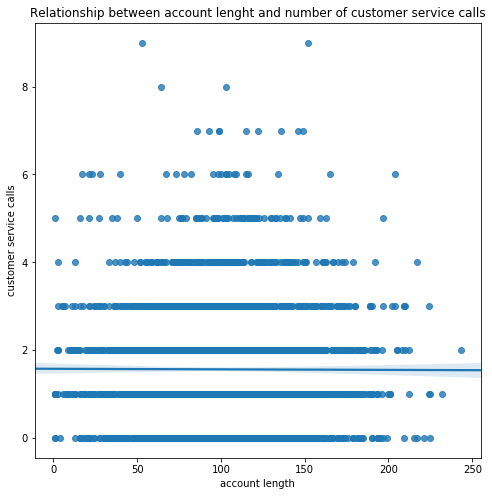

In [332]:

plt.figure(figsize = (8,8))

sns.regplot(x = 'account length', y = 'customer service calls', data =numerics1)

plt.title('Relationship between account lenght and number of customer service calls')

Text(0.5,1,'Relationship between Total call minutes spent by a customer during evening and revenue generated')

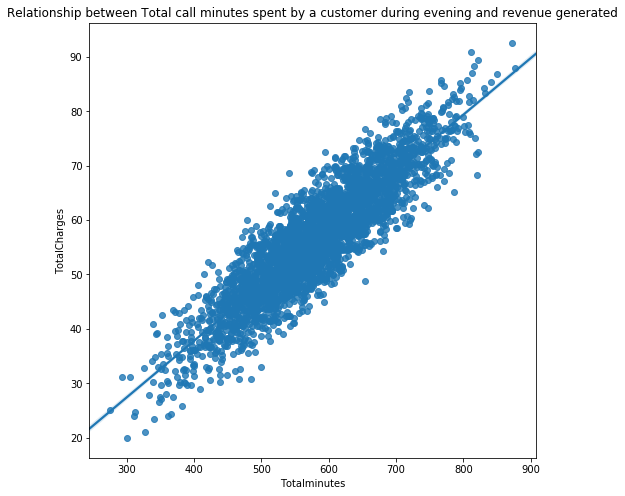

In [177]:
plt.figure(figsize = (8,8))

sns.regplot(x = 'Totalminutes', y = 'TotalCharges', data = numerics1)

plt.title('Relationship between Total call minutes spent by a customer during evening and revenue generated')

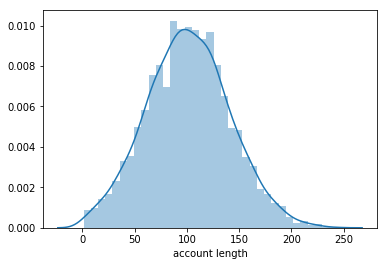

In [104]:
sns.distplot(numerics1['account length'])

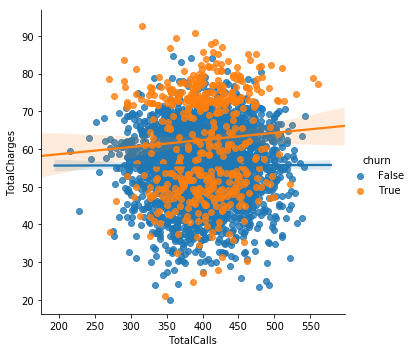

In [93]:
sns.lmplot(x="TotalCalls", y="TotalCharges", hue="churn", data=numerics1)

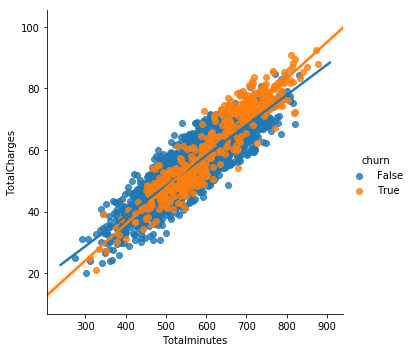

In [95]:
sns.lmplot(x="Totalminutes", y="TotalCharges", hue="churn", data=numerics1)

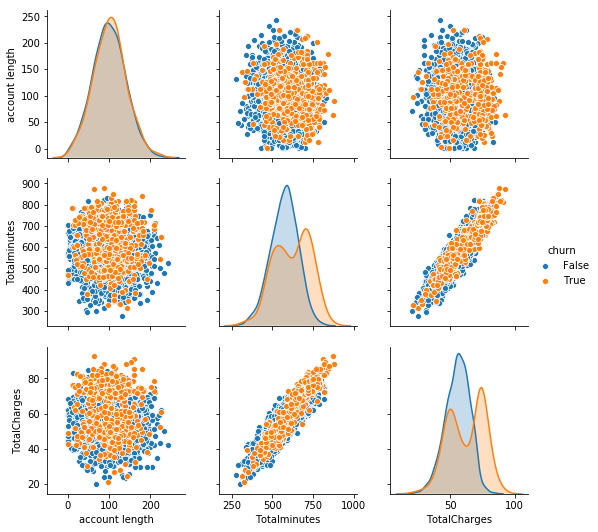

In [334]:
# pair relationship

sns.pairplot(numerics1,vars = ['account length','Totalminutes','TotalCharges'], hue="churn")



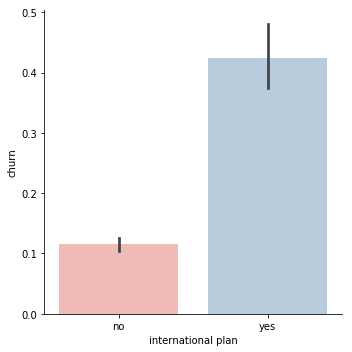

In [362]:
g = sns.factorplot(y="churn",x="international plan",data=telcom_data1,kind="bar" ,palette = "Pastel1")


#### We observed the linear relationship between total minutes spent by a customer and total revenue. Customers that spend more on thier calls, represent higher revenue. Customers with the longest account lenght tend to churn, churn possiblity is also higher among customers with internatinal plan. 

  ### <font color='green'>Next we want to explore categorical variables</font> 



In [335]:
telcom_data1.describe(include = 'object')

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,334-5337,no,no
freq,106,1,3010,2411


### From this table , we can already observe:
- most customers don't have an internatioal plan
- most customers do not use voice mail plan
- most customers live in West Virginia


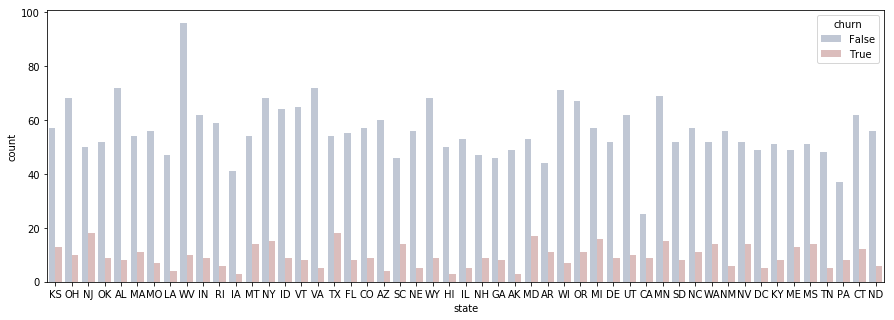

In [336]:
plt.figure(figsize = (15,5))
sns.countplot(telcom_data.state, hue = telcom_data.churn, palette="vlag")

### This graph tells as that residance of west virginia and Wisconson tend to be the most loyal while residance of New jercy and Texas tend to churn. 

In [232]:
# Looking at correlation
pd.DataFrame(telcom_data.corr()['churn'].sort_values(ascending=False))


,churn
churn,1.000000
customer service calls,0.208750
total day minutes,0.205151
total day charge,0.205151
total eve minutes,0.092796
total eve charge,0.092786
total intl charge,0.068259
total intl minutes,0.068239
total night charge,0.035496
total night minutes,0.035493


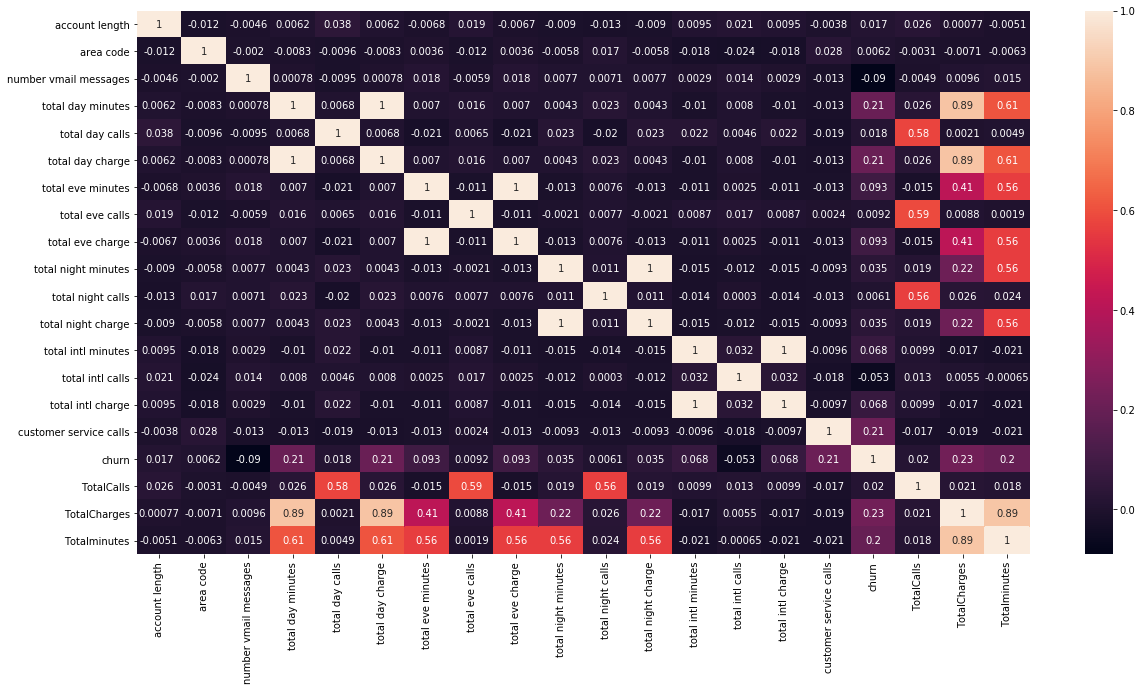

In [355]:
#Correlation matrix

def show_correlations(telcom_data1, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = telcom_data1.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

correlation_df = show_correlations(telcom_data1,show_chart=True)

 ### <font color='green'>Preprocessing </font> 

- Encode categorical varibales
- Balance the dataset using SMO to insure that we don't have a biased model 

In [339]:
# selecting relavent columns
df_model=telcom_data1[['state', 'account length','international plan','voice mail plan', 'number vmail messages','total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'TotalCalls', 'TotalCharges',
       'Totalminutes']]

In [340]:
cat_columns=['international plan','voice mail plan']


In [341]:
df_model[['churn']] = df_model[['churn']].astype(int)

In [342]:
# encode chrun column 
df_model.replace({'False': 0, 'True': 1}, inplace=True)

In [343]:
# encode categorical values 
for item in cat_columns:
    df_model[item].replace(to_replace=['yes', 'no'], value= [1,0], inplace = True)
    
df_model.head()

,state,account length,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,TotalCalls,TotalCharges,Totalminutes
0,KS,128,0,1,25,10.0,3,2.70,1,0,300,72.86,707.2
1,OH,107,0,1,26,13.7,3,3.70,1,0,329,55.54,611.5
2,NJ,137,0,0,0,12.2,5,3.29,0,0,328,59.00,527.2
3,OH,84,1,0,0,6.6,7,1.78,2,0,248,65.02,558.2
4,OK,75,1,0,0,10.1,3,2.73,3,0,356,49.36,501.9


In [344]:
# encoding state column
from sklearn.preprocessing import LabelEncoder
df_model['state_encoded'] = LabelEncoder().fit_transform(df_model['state'])

In [345]:
df_model.head()

,state,account length,international plan,voice mail plan,number vmail messages,total intl minutes,total intl calls,total intl charge,customer service calls,churn,TotalCalls,TotalCharges,Totalminutes,state_encoded
0,KS,128,0,1,25,10.0,3,2.70,1,0,300,72.86,707.2,16
1,OH,107,0,1,26,13.7,3,3.70,1,0,329,55.54,611.5,35
2,NJ,137,0,0,0,12.2,5,3.29,0,0,328,59.00,527.2,31
3,OH,84,1,0,0,6.6,7,1.78,2,0,248,65.02,558.2,35
4,OK,75,1,0,0,10.1,3,2.73,3,0,356,49.36,501.9,36


In [346]:
df_model2=df_model[['state_encoded', 'account length','international plan','voice mail plan', 'number vmail messages','total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'TotalCalls', 'TotalCharges',
       'Totalminutes']]

#### For our model, we first look at several different machine learning algorithms to see which one to move forward with.Since we are trying to predict customer churn , we are dealing with a classification task. we test two models. Logistic regression and RandomForest. Our first step is to split our data into training and test sets using train-test-split, which would allow us to cross-validate our results later. We also stratified the train-test-split, to ensure that the same proportion of our target variable was found in both our training and test sets.

In [347]:
# split into train and test 

from sklearn.model_selection import train_test_split

X = df_model1.drop('churn',axis=1)
y = df_model1['churn']

# Stratify our train-test-split so that we have a balanced split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

In [348]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, ratio=1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [349]:
#Now that our data was balanced, we then performed yet another train-test-split 

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_train_res, y_train_res, test_size=0.33, random_state=20)

In [350]:
# fitting the model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result1 = model.fit(X_train_2,y_train_2)
prediction_test = model.predict(X_test_2)

#### For this analysis , our target performance metric is recall. We want to capture as many true positives (people who are likely to churn) 

In [373]:
# measure our recall score 
recall_score(y_test_2, prediction_test)

0.8095238095238095

#### our Logetic regression model gave us 80% recall.

In [353]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

international plan        2.609047
customer service calls    0.630749
TotalCharges              0.068438
total intl minutes        0.053630
total intl charge         0.039902
number vmail messages     0.026644
state_encoded             0.002951
Totalminutes              0.001005
account length           -0.000675
TotalCalls               -0.001595
total intl calls         -0.031410
voice mail plan          -1.833301
dtype: float64

#### This table tells us that some variables have a positive relation to our predicted variable and some have a negative relation. For example, having internatioal plan and making lots of customer service calls increases the probability of a customer to churn. While customers who have a voice mail plan are unlikely to churn. 

### The next model we try is Random forest, we use cross_val_score to make sure theres no overfir and GridSearchCV to tune ourmodel

In [363]:
# fitting the model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV

Rfclf = RandomForestClassifier(random_state=15)
Rfclf.fit(X_train_2,y_train_2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=15, verbose=0, warm_start=False)

In [379]:

Prediction_RF=Rfclf.predict(X_test_2)


In [364]:
 # 10 Folds Cross Validation 
clf_score = cross_val_score(Rfclf, X_train_2,y_train_2, cv=10)
print(clf_score)
clf_score.mean()

[0.97014925 0.96268657 0.95149254 0.96641791 0.96268657 0.94756554
 0.95131086 0.97003745 0.95488722 0.96616541]


0.9603399325077746

In [365]:
# Grid search to find optimal perameter 

%%time
param_grid  = { 
                'n_estimators' : [500,1200],
               # 'min_samples_split': [2,5,10,15,100],
               # 'min_samples_leaf': [1,2,5,10],
                'max_depth': range(1,5,2),
                'max_features' : ('log2', 'sqrt'),
                'class_weight':[{1: w} for w in [1,1.5]]
              }

GridRF = GridSearchCV(RandomForestClassifier(random_state=15), param_grid)

GridRF.fit(X_train_2,y_train_2)
#RF_preds = GridRF.predict_proba(X_test)[:, 1]
#RF_performance = roc_auc_score(Y_test, RF_preds)

print(
    #'DecisionTree: Area under the ROC curve = {}'.format(RF_performance)
     "\nBest parameters \n" + str(GridRF.best_params_))


Best parameters 
{'class_weight': {1: 1}, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 500}
CPU times: user 51.3 s, sys: 732 ms, total: 52 s
Wall time: 52.6 s


In [366]:
# fitting the model with suggested permater 
rf = RandomForestClassifier(random_state=15,**GridRF.best_params_)
rf.fit(X_train_2,y_train_2)

RandomForestClassifier(bootstrap=True, class_weight={1: 1}, criterion='gini',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=15, verbose=0, warm_start=False)

In [375]:
predict_rf1=rf.predict(X_test_2)

In [370]:
# check accuracy score for training set 
clf_score = cross_val_score(rf, X_train_2,y_train_2, cv=10)
print(clf_score)
clf_score.mean()

[0.88059701 0.90298507 0.92910448 0.88432836 0.8880597  0.87640449
 0.89513109 0.88014981 0.91353383 0.90977444]


0.8960068290800791

In [377]:
# Check recall score for RandomForest

recall_score(predict_rf1,y_test_2)

0.9044585987261147

### Randomforest retuend 90% recall score which means it's our model of choice 

In [381]:
# Save prediction to csv
predict_rf2=pd.DataFrame(predict_rf1)
predict_rf2.to_csv("prediction.csv")


### potential issues with deploying the model into production:

- The first issue we might run into is model compatibility.
The tools used to create the models might differe from the tools used to deploy it. For example,a model can be developed using R or Python , howerver languages like Java or C++ are are more geared toward building scalable applications. When the creation environment is differe from the production environment, this could lead to longer cycle times and inconsistencies with the model performance. 

- The model does not scale.
The dataset used to create the model is ususally static with fixed number of records. As we move the model into production, the volume of data will keep increasing. Several tools will be needed to monitor and solve scalability challenges. 

- Model drift 
Models degrade in accuracy when they are put in production. There's an assumption that once a model is built and goes life , that theres no need to update it and that it will keep operating as normal. However, that's not the case.Predictions made by a model trained on historical data are no longer correct or as correct as they could be if the model was trained on more recent historical data. To overcome this, a  model shold be Periodically Re-Fit and updated. 





### <font color='green'> Experiment Design </font> 
Following up on the telecom customer data, here's a suggestion for designing an experiment to explore how to reduce customer churn according to the outputs from the predictive model. 

Goal:
Reducing customer churn by 4% in two months . To track our performance, we can measure the monthly number of international calls if it has increased after the experiment. 

for our hypothesis I choose to focus on international calls  
Hypothesis 
H0 discounts on internatioal calls have a positive effect on customer churn
H1 discounts on internatioal calls have a negative effect on customer churn

To test our hypothesis , we first need to devide our customers into 2 groups.  Group A will get the discount( treatment group) and group B will not get the discount (Control group). Next we are going to randomaly assign customers to each group. This will allow us to compare the results between the two groups. A possible scenario is taking 1000 customers and dividing them evenly between the two groups. The result could be that our control group has had 6% churn rate while our treatment group has 4% churn rate. However, since we rolled out our experiment on only sample of the population, we can't be sure that the population will respond the same. To figure out if our results are likely to hold in the future, we will need to carry out a statistical test. 

An example of a statistical test is a complete random ANOVA signifacants test between the two groups. Based on the f-value and P-value score , we can choose to either reject or fail to reject the null hypothesis. If our P-value is more than 0.05 , we reject the null hypothesis which means having a discount on internatioal calls reducees churn. To measue our ressults we can look at the monthly churn rate for our customers after rolling the discount. 

It's important to note that we can't always rely on statistical significant, because even with a 95% confidence  level the sample size does not always provide consistent results. We need to keep collecting data even after after reaching statistical significance. The more data we collect the more accurate our results will be. Another challange that could have an impact on our test results is if the sample isn’t representative of the target audience. Our goal is to reduce churn by offering discounts on internatioal calls. We could have customers in our sample that never make internatioal calls.It's crucial when designing our test that we know where our customers are coming from. We should also take into consideration the time/date of the experiment such as weekends/holidays. To ensure that our sampling is as random as possible, we should run our tests every day of the week.






